# Project for Programming for DA
## Vitalijs Smirnovs
## ID: G00317774
### Lecturer: Dr. Brian McGinley

#### Data to be simulated:
Thrd level educational attainment in Galway county population by age, gender and marital status.

Sources of original data: [(CSO.ie, 2019a,](https://statbank.cso.ie/px/pxeirestat/Statire/SelectVarVal/Define.asp?maintable=NSA87&PLanguage=0) [CSO.ie, 2019b)](https://statbank.cso.ie/px/pxeirestat/Statire/SelectVarVal/Define.asp?MainTable=E2028&TabStrip=Select&PLanguage=0&FF=1#)

Four variables to be simulated:
- age
- gender
- marital status
- third level educational attainment

In [1]:
# import needed packages
import pandas as pd
import seaborn as sn
import numpy as np

### Gender

The hypothesis is that there are differences in the varibles by gender. So Gender is the first variable to be generated.
To know how many observations to simulate, I checked the CSO.ie data and Galway County (including Galway City) had a population of 258,058 people as counted in the last 2016 Srnsus of population.[(CSO.ie, 2019c)](https://statbank.cso.ie/px/pxeirestat/Statire/SelectVarVal/Define.asp?MainTable=E2028&TabStrip=Select&PLanguage=0&FF=1#)

The population of 258,058 people includes 127,663 Males and 130,395 Females, in proportions:
* Male	0.494706616; 
* Female	0.505293384. [(CSO.ie, 2019d)](https://statbank.cso.ie/px/pxeirestat/Statire/SelectVarVal/saveselections.asp])

In this assignment 30% representive sample is generated: 77,417 persons - 49% Males and 51% Females.


In [2]:
# randomly choose male or female with probabilities 0.49 for male and 0.51 for female
gender = np.random.choice(['Male','Female'],77417, p=[0.49,0.51], replace=True)
# how many values are generated?
print(len(gender))
# record values into the dataframe
df = pd.DataFrame(data=gender, columns=['gender'])
# view the head of dataframe
df.head()
# count by gender:
df2=df['gender'].value_counts()
print(df2)

77417
Female    39164
Male      38253
Name: gender, dtype: int64


Two variable of remaning three variable will presumably depend on age - marital status and third level educational attainment. So age is the next variable to be simulated.

### Age
Again the age distribution is available from: [(CSO.ie, 2019e)](https://statbank.cso.ie/px/pxeirestat/Statire/SelectVarVal/saveselections.asp)

It is assumed that age is equally distributed by gender, although in very young or very old ages it may not be the case as more boys are bord and women live longer than men.  However as the age is presented in groups, this distinction may be insignifican in this context.

The proportions of population that fall into each age groups are presented below. Were proportions are similar between the age groups, the data is further aggregated (explained in the code).

Again, 30% sample is generated.


Age Group | N  | Proportion|  
----------|----:|--------:|
All ages	       | 258058	  |
0 - 4 years	       | 17799	|0.068972867
5 - 9 years	       | 18885	|0.073181223
10 - 14 years	   | 17198	|0.066643933
15 - 19 years	   | 16600	|0.064326624
20 - 24 years	   | 16470	|0.063822862
25 - 29 years	   | 15304	|0.059304497
30 - 34 years	   | 18859	|0.07308047
35 - 39 years	   | 21175	|0.082055197
40 - 44 years	   | 19420	|0.0752544
45 - 49 years	   | 17691	|0.068554356
50 - 54 years	   | 15796	|0.061211046
55 - 59 years	   | 14639	|0.056727557
60 - 64 years	   | 13316	|0.051600803
65 - 69 years	   | 11434	|0.044307869
70 - 74 years	   | 8808	|0.034131862
75 - 79 years	   | 6239	|0.024176735
80 - 84 years	   | 4479	|0.017356563
85 years and over  | 3946	|0.015291136

In [3]:
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.tolist.html
# generate a list with random numbers  between 0-5 of a specified lenngth
age = list(np.random.randint(0, 5, 5340))
# extend the list (adapted from:https://stackabuse.com/append-vs-extend-in-python-lists/)
# NOTE: similar proportion fall into 10-25 categories, so group together
# NOTE: also 45-54, 55-61 and 80+
age.extend(np.random.randint(5, 10,  5669))
age.extend(np.random.randint(10, 25, 15080))
age.extend(np.random.randint(25, 30, 4591))
age.extend(np.random.randint(30, 35, 5657))
age.extend(np.random.randint(35, 40, 6352))
age.extend(np.random.randint(40, 45, 5826))
age.extend(np.random.randint(45, 55, 10046))
age.extend(np.random.randint(55, 65, 8386)) 
age.extend(np.random.randint(65, 70, 3430)) 
age.extend(np.random.randint(70, 75, 2642))           
age.extend(np.random.randint(75, 80, 1871))           
age.extend(np.random.randint(80, 100, 2527))
# check that list is of length of the simulated sample size
len(age)  
print(age)

[1, 2, 4, 1, 0, 0, 0, 3, 1, 2, 2, 4, 0, 2, 2, 3, 3, 1, 0, 0, 3, 4, 4, 4, 0, 3, 4, 4, 2, 4, 4, 2, 3, 3, 4, 0, 3, 1, 1, 2, 4, 2, 1, 3, 4, 4, 1, 2, 3, 2, 0, 3, 1, 0, 1, 0, 4, 0, 4, 1, 3, 0, 4, 2, 2, 4, 1, 3, 0, 1, 0, 0, 3, 0, 1, 0, 0, 4, 0, 3, 2, 3, 1, 3, 3, 0, 3, 1, 2, 1, 4, 4, 2, 3, 1, 1, 0, 0, 1, 4, 0, 1, 4, 3, 4, 4, 2, 4, 1, 0, 2, 0, 3, 2, 4, 1, 3, 2, 2, 3, 0, 3, 4, 3, 2, 1, 2, 2, 1, 4, 0, 3, 4, 3, 2, 0, 2, 3, 0, 1, 4, 1, 2, 2, 3, 2, 1, 3, 3, 1, 4, 4, 0, 1, 4, 1, 0, 4, 3, 0, 2, 1, 1, 1, 2, 4, 4, 1, 3, 3, 0, 0, 4, 2, 0, 3, 1, 4, 2, 3, 0, 0, 1, 1, 1, 0, 3, 1, 2, 2, 3, 1, 4, 1, 0, 2, 4, 1, 1, 2, 0, 4, 1, 3, 3, 0, 0, 4, 4, 1, 0, 2, 4, 0, 4, 0, 4, 2, 0, 1, 1, 3, 2, 3, 0, 1, 4, 3, 1, 2, 4, 1, 2, 4, 1, 1, 3, 3, 3, 3, 1, 2, 2, 1, 3, 1, 2, 3, 4, 4, 3, 3, 3, 2, 3, 2, 4, 4, 4, 4, 1, 2, 2, 3, 2, 4, 4, 1, 2, 3, 1, 4, 1, 0, 4, 4, 3, 0, 3, 0, 0, 3, 4, 3, 1, 0, 4, 4, 1, 3, 3, 2, 0, 3, 3, 2, 0, 3, 4, 3, 4, 0, 1, 4, 4, 1, 4, 4, 3, 3, 2, 2, 1, 0, 4, 3, 3, 4, 4, 0, 2, 0, 3, 1, 3, 4, 1, 1, 4, 4, 2, 2, 2, 

In [4]:
# shuffle the list, to insure values are fully randomly positioned within the list
np.random.shuffle(age)
# see tha vales are mixed now
print(age)
# write into a dataframe column
# https://stackoverflow.com/questions/26666919/add-column-in-dataframe-from-list
df['age']= age
df
df['age'].describe()


[8, 68, 14, 49, 51, 59, 52, 72, 25, 53, 7, 21, 38, 36, 19, 70, 28, 58, 51, 8, 22, 16, 7, 2, 88, 54, 11, 0, 56, 14, 1, 56, 28, 1, 74, 13, 0, 14, 31, 6, 27, 72, 24, 54, 77, 20, 41, 33, 22, 8, 97, 69, 4, 63, 70, 10, 16, 59, 31, 19, 37, 45, 23, 97, 46, 50, 19, 11, 50, 4, 22, 20, 11, 8, 51, 54, 15, 50, 21, 53, 17, 46, 1, 67, 71, 38, 13, 25, 26, 50, 14, 59, 28, 2, 37, 44, 54, 34, 24, 33, 3, 68, 21, 16, 3, 45, 25, 7, 9, 63, 40, 28, 56, 35, 21, 23, 0, 65, 41, 93, 45, 10, 18, 46, 77, 50, 27, 28, 45, 41, 57, 34, 35, 61, 9, 67, 63, 19, 42, 31, 10, 42, 51, 30, 42, 1, 4, 1, 31, 36, 57, 60, 58, 11, 84, 24, 0, 63, 21, 6, 55, 18, 40, 67, 57, 63, 6, 19, 79, 72, 40, 64, 2, 1, 32, 3, 9, 10, 48, 25, 39, 16, 17, 1, 83, 23, 60, 32, 50, 48, 37, 54, 55, 53, 15, 54, 17, 39, 44, 13, 36, 56, 1, 14, 14, 61, 45, 3, 23, 1, 48, 13, 74, 77, 3, 72, 28, 67, 64, 3, 66, 70, 15, 93, 54, 2, 41, 48, 65, 14, 34, 39, 2, 50, 32, 2, 13, 40, 42, 34, 54, 56, 46, 44, 21, 33, 21, 44, 9, 54, 20, 10, 7, 25, 32, 19, 8, 14, 89, 74, 4, 

count    77417.000000
mean        37.185476
std         23.042010
min          0.000000
25%         18.000000
50%         36.000000
75%         54.000000
max         99.000000
Name: age, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0938C110>,
      dtype=object)

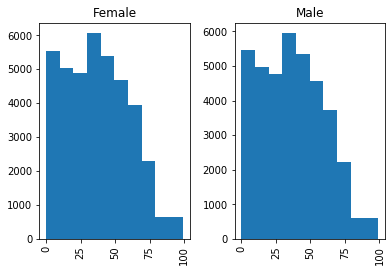

In [5]:
# https://stackoverflow.com/questions/19584029/plotting-histograms-from-grouped-data-in-a-pandas-dataframe
# check that age generated in a similar shape by gender
df['age'].hist(by=df['gender'])

### Marital Status
Judging from CSO.ie (2019), the marital status dependent on both age and gender. In particular, it is reported that: "There were 94,924 men and 127,149 women separated or divorced in 2016. Figure below shows the age and sex breakdown of the separated or divorced population for 2011 and 2016. There were nearly 90% more separated or divorced women (7,244) than men (3,830) in the 25-34 age group. The proportionate difference between sexes reduces with age, and for persons aged 65 years and over, there are 4% more women (18,743) than men (18,097) separated or divorced." [(CSO.ie, 2019)](https://www.cso.ie/en/releasesandpublications/ep/p-cp4hf/cp4hf/ms/)

The figure, mentioned in the quated paragraph confirms:

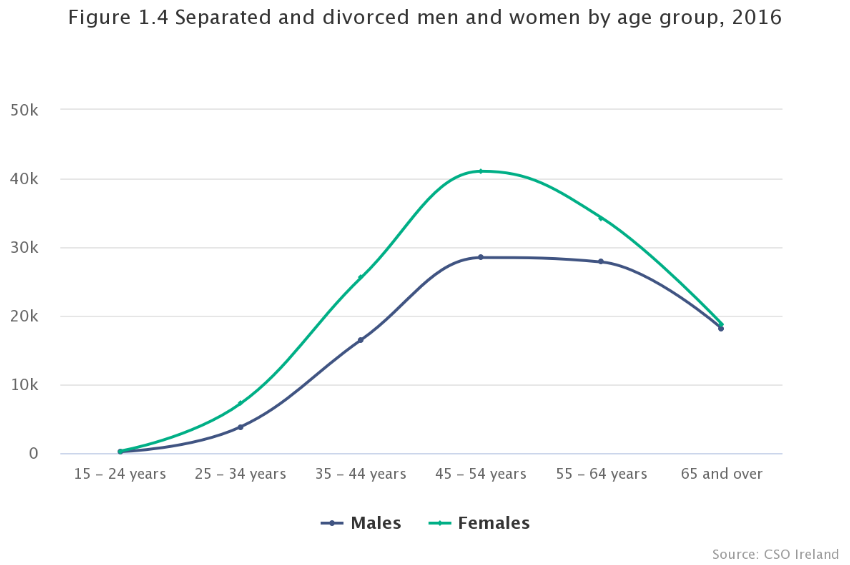



UN.org (2019) reports population numbers by  Country, Age, Sex, Marital Status and Year: [(UN.org, 2019)](http://data.un.org/Data.aspx?d=POP&f=tableCode%3A23)

The UN data is aggeraged to age groups and four maritatl statuses: 
* "divorced" (includes separated), 
* "Maried", 
* "single" and 
* "other" (widowed + in relationship).

The proportions in each group are then calculated. It is assumed that statistics for Ireland is representative of Galway County.

In [6]:
# adapted from: https://stackoverflow.com/questions/16327055/how-to-add-an-empty-column-to-a-dataframe
# add an empty column to data frame for marital status
df['marital'] = np.nan
# view data frame
df.head()


,gender,age,marital
0,Male,8,NaN
1,Female,68,NaN
2,Male,14,NaN
3,Female,49,NaN
4,Male,51,NaN


In [7]:
# calculate number of people in each age group by gender
# this will determin the length of the array with random marital statuses generated
# step 1 identify who meat the criteria (boolean)
# https://stackoverflow.com/questions/48547639/counting-values-in-a-row-that-match-a-condition-python
# Males
age_0_14m=df.apply(lambda x: True if x['gender']=="Male" and x['age']>=0 and x['age']<=14 else False, axis=1)
age_15_19m=df.apply(lambda x: True if x['gender']=="Male" and x['age']>=15 and x['age']<=19  else False, axis=1)
age_20_24m=df.apply(lambda x: True if x['gender']=="Male" and x['age']>=20 and x['age']<=24  else False, axis=1)
age_25_29m=df.apply(lambda x: True if x['gender']=="Male" and x['age']>=25 and x['age']<=29  else False, axis=1)
age_30_34m=df.apply(lambda x: True if x['gender']=="Male" and x['age']>=30 and x['age']<=34  else False, axis=1)
age_35_39m=df.apply(lambda x: True if x['gender']=="Male" and x['age']>=35 and x['age']<=39  else False, axis=1)
age_40_44m=df.apply(lambda x: True if x['gender']=="Male" and x['age']>=40 and x['age']<=44  else False, axis=1)
age_45_49m=df.apply(lambda x: True if x['gender']=="Male" and x['age']>=45 and x['age']<=49  else False, axis=1)
age_50_54m=df.apply(lambda x: True if x['gender']=="Male" and x['age']>=50 and x['age']<=54  else False, axis=1)
age_55_59m=df.apply(lambda x: True if x['gender']=="Male" and x['age']>=55 and x['age']<=59  else False, axis=1)
age_60_64m=df.apply(lambda x: True if x['gender']=="Male" and x['age']>=60 and x['age']<=64  else False, axis=1)
age_65_100m=df.apply(lambda x: True if x['gender']=="Male" and x['age']>=65 and x['age']<=100 else False, axis=1)

#Females
age_0_14f=df.apply(lambda x: True if x['gender']=="Female" and x['age']>=0 and x['age']<=14 else False, axis=1)
age_15_19f=df.apply(lambda x: True if x['gender']=="Female" and x['age']>=15 and x['age']<=19  else False, axis=1)
age_20_24f=df.apply(lambda x: True if x['gender']=="Female" and x['age']>=20 and x['age']<=24  else False, axis=1)
age_25_29f=df.apply(lambda x: True if x['gender']=="Female" and x['age']>=25 and x['age']<=29  else False, axis=1)
age_30_34f=df.apply(lambda x: True if x['gender']=="Female" and x['age']>=30 and x['age']<=34  else False, axis=1)
age_35_39f=df.apply(lambda x: True if x['gender']=="Female" and x['age']>=35 and x['age']<=39  else False, axis=1)
age_40_44f=df.apply(lambda x: True if x['gender']=="Female" and x['age']>=40 and x['age']<=44  else False, axis=1)
age_45_49f=df.apply(lambda x: True if x['gender']=="Female" and x['age']>=45 and x['age']<=49  else False, axis=1)
age_50_54f=df.apply(lambda x: True if x['gender']=="Female" and x['age']>=50 and x['age']<=54  else False, axis=1)
age_55_59f=df.apply(lambda x: True if x['gender']=="Female" and x['age']>=55 and x['age']<=59  else False, axis=1)
age_60_64f=df.apply(lambda x: True if x['gender']=="Female" and x['age']>=60 and x['age']<=64  else False, axis=1)
age_65_100f=df.apply(lambda x: True if x['gender']=="Female" and x['age']>=65 and x['age']<=100 else False, axis=1)


In [8]:
# record the count into a separate scalar
#Males
Nage_0_14m=len(age_0_14m[age_0_14m==True])
Nage_15_19m=len(age_15_19m[age_15_19m==True])
Nage_20_24m=len(age_20_24m[age_20_24m==True])
Nage_25_29m=len(age_25_29m[age_25_29m==True])
Nage_30_34m=len(age_30_34m[age_30_34m==True])
Nage_35_39m=len(age_35_39m[age_35_39m==True])
Nage_40_44m=len(age_40_44m[age_40_44m==True])
Nage_45_49m=len(age_45_49m[age_45_49m==True])
Nage_50_54m=len(age_50_54m[age_50_54m==True])
Nage_55_59m=len(age_55_59m[age_55_59m==True])
Nage_60_64m=len(age_60_64m[age_60_64m==True])
Nage_65_100m=len(age_65_100m[age_65_100m==True])

#Females
Nage_0_14f=len(age_0_14f[age_0_14f==True])
Nage_15_19f=len(age_15_19f[age_15_19f==True])
Nage_20_24f=len(age_20_24f[age_20_24f==True])
Nage_25_29f=len(age_25_29f[age_25_29f==True])
Nage_30_34f=len(age_30_34f[age_30_34f==True])
Nage_35_39f=len(age_35_39f[age_35_39f==True])
Nage_40_44f=len(age_40_44f[age_40_44f==True])
Nage_45_49f=len(age_45_49f[age_45_49f==True])
Nage_50_54f=len(age_50_54f[age_50_54f==True])
Nage_55_59f=len(age_55_59f[age_55_59f==True])
Nage_60_64f=len(age_60_64f[age_60_64f==True])
Nage_65_100f=len(age_65_100f[age_65_100f==True])

In [9]:
# verify that counters add up to correct numbers
# Male
Nm=(Nage_0_14m + Nage_15_19m + Nage_20_24m + Nage_25_29m + Nage_30_34m + Nage_35_39m + Nage_40_44m + Nage_45_49m + Nage_55_59m + Nage_50_54m + Nage_60_64m + Nage_65_100m)
print(Nm)

# Female
Nf=(Nage_0_14f + Nage_15_19f + Nage_20_24f + Nage_25_29f + Nage_30_34f + Nage_35_39f + Nage_40_44f + Nage_45_49f + Nage_55_59f + Nage_50_54f + Nage_60_64f + Nage_65_100f)
print(Nf)

# Total
N=Nm+Nf
print(N)

38253
39164
77417


In [10]:
# generate randome array of marital statuses by gender and marital status
# array to be chosen from:
status = ['divorced', 'maried', 'single', 'other']
# Males
# due to fluctuations in array length due to rounding, generate lists of extra 0.1% length
# for this multiply counters by 1.001
# pop() (code below) can be performed on lists, not arrays, so generate lists of values
age_0_14ml=list(np.random.choice(status, size=int(Nage_0_14m*1.001) ,replace=True , 
                             p=[0.00, 0.00, 1.00, 0.00]))
age_15_19ml=list(np.random.choice(status, size=int(Nage_15_19m*1.001) ,replace=True ,
                             p=[0.000084211071813, 0.001457499319834, 0.998257478590954, 0.000200811017399]))
age_20_24ml=list(np.random.choice(status, size=int(Nage_20_24m*1.001), replace=True,
                             p=[0.001279049601110, 0.015905017921147, 0.981638050641693, 0.001177881836050]))
age_25_29ml=list(np.random.choice(status, size=int(Nage_25_29m*1.001) ,replace=True,
                             p=[0.005186807736816, 0.111092742602083, 0.880799856725630, 0.002920592935471]))
age_30_34ml=list(np.random.choice(status, size=int(Nage_30_34m*1.001) ,replace=True,
                             p=[0.017501449275362, 0.365594202898551, 0.612800000000000, 0.004104347826087]))
age_35_39ml=list(np.random.choice(status, size=int(Nage_35_39m*1.001) ,replace=True,
                             p=[0.033811405511212, 0.563810303478749, 0.398001647800920, 0.004376643209119]))
age_40_44ml=list(np.random.choice(status, size=int(Nage_40_44m*1.001 ),replace=True,
                             p=[0.056368952204637, 0.647895830040864, 0.290011965773373, 0.005723251981126]))
age_45_49ml=list(np.random.choice(status, size=int(Nage_45_49m*1.001) ,replace=True,
                             p=[0.080382586645166, 0.678715848171696, 0.232438620570803, 0.008462944612336]))
age_50_54ml=list(np.random.choice(status, size=int(Nage_50_54m*1.001) ,replace=True,
                             p=[0.102525902349834, 0.690702241484391, 0.193383896526038, 0.013387959639737]))
age_55_59ml=list(np.random.choice(status, size=int(Nage_55_59m*1.001) ,replace=True,
                             p=[0.112552681596562, 0.701857847961476, 0.162803975629362, 0.022785494812600]))
age_60_64ml=list(np.random.choice(status, size=int(Nage_60_64m*1.001) ,replace=True,
                             p=[0.106006947098440, 0.709478797761302, 0.147995278011329, 0.036518977128929]))
age_65_100ml=list(np.random.choice(status, size=int(Nage_65_100m*1.001) ,replace=True,
                              p=[0.060743408465403, 0.672058577776868, 0.146290186001694, 0.120907827756035]))

#Females   
age_0_14fl=list(np.random.choice(status, size=int(Nage_0_14f*1.001) ,replace=True,
                            p=[0.0000000000000, 0.0000000000000, 1.0000000000000, 0.0000000000000]))
age_15_19fl=list(np.random.choice(status, size=int(Nage_15_19f*1.001) ,replace=True,
                             p=[0.0001062304138, 0.0019586232538, 0.9977260052053, 0.0002091411271]))
age_20_24fl=list(np.random.choice(status, size=int(Nage_20_24f*1.001),replace=True,
                             p=[0.0016199513649, 0.0228329036623, 0.9744062311448, 0.0011409138281]))
age_25_29fl=list(np.random.choice(status, size=int(Nage_25_29f*1.001) ,replace=True,
                             p=[0.0078300115613, 0.1425513770776, 0.8470636613983, 0.0025549499628]))
age_30_34fl=list(np.random.choice(status, size=int(Nage_30_34f*1.001) ,replace=True,
                             p=[0.0239854344411, 0.4053460707962, 0.5664276079511, 0.0042408868116]))
age_35_39fl=list(np.random.choice(status, size=int(Nage_35_39f*1.001) ,replace=True,
                             p=[0.0437916328450, 0.5776815739631, 0.3732699418912, 0.0052568513007]))
age_40_44fl=list(np.random.choice(status, size=int(Nage_40_44f*1.001) ,replace=True,
                             p=[0.0697862957747, 0.6455169240954, 0.2762501613021, 0.0084466188277]))
age_45_49fl=list(np.random.choice(status, size=int(Nage_45_49f*1.001) ,replace=True,
                             p=[0.0997362403321, 0.6685645872638, 0.2184157800300, 0.0132833923741]))
age_50_54fl=list(np.random.choice(status, size=int(Nage_50_54f*1.001 ),replace=True,
                             p=[0.1223190561872, 0.6796303556051, 0.1753465416202, 0.0227040465875]))
age_55_59fl=list(np.random.choice(status, size=int(Nage_55_59f*1.001) ,replace=True,
                             p=[0.1276075358018, 0.6884341922278, 0.1450787247449, 0.0388795472255]))
age_60_64fl=list(np.random.choice(status, size=int(Nage_60_64f*1.001),replace=True,
                             p=[0.1140567513850, 0.6930562016323, 0.1287182306424, 0.0641688163403]))
age_65_100fl=list(np.random.choice(status, size=int(Nage_65_100f*1.001) ,replace=True,
                              p=[0.0911241579274, 0.6829335141295, 0.1190610139011, 0.1068813140420]))


In [11]:
### PLEASE, NOTE: this cell takes a while to run as even 30% samle is still a large data set

# iterate over rows in pandas data frame:
# https://stackoverflow.com/questions/55114954/iterate-over-pandas-rows-and-set-column-values-based-on-values-in-other-column
# remove the last calue on the list:
# https://thispointer.com/python-how-to-remove-element-from-a-list-by-value-or-index-remove-vs-pop-vs-del/


# iterate over rows of data frame, 
# and if meets conditions for gender and age - cut-paste a value from a corresponding list
# and record into "marital" columns
# Males
for idx, val in enumerate(df.itertuples()):
    if (df.gender[idx] == 'Male') & (df.age[idx]>=0) & (df.age[idx]<=14) & (len(age_0_14ml)>0):
        df.loc[idx, 'marital']=age_0_14ml.pop()
    elif (df.gender[idx] == 'Male') & (df.age[idx]>=15) & (df.age[idx]<=19) & (len(age_15_19ml)>0):
        df.loc[idx, 'marital']=age_15_19ml.pop()
    elif (df.gender[idx] == 'Male') & (df.age[idx]>=20) & (df.age[idx]<=24) & (len(age_20_24ml)>0):
        df.loc[idx, 'marital']=age_20_24ml.pop()
    elif (df.gender[idx] == 'Male') & (df.age[idx]>=25) & (df.age[idx]<=29) & (len(age_25_29ml)>0):
        df.loc[idx, 'marital']=age_25_29ml.pop()
    elif (df.gender[idx] == 'Male') & (df.age[idx]>=30) & (df.age[idx]<=34) & (len(age_30_34ml)>0):
        df.loc[idx, 'marital']=age_30_34ml.pop()
    elif (df.gender[idx] == 'Male') & (df.age[idx]>=35) & (df.age[idx]<=39) & (len(age_35_39ml)>0):
        df.loc[idx, 'marital']=age_35_39ml.pop()
    elif (df.gender[idx] == 'Male') & (df.age[idx]>=40) & (df.age[idx]<=44) & (len(age_40_44ml)>0):
        df.loc[idx, 'marital']=age_40_44ml.pop()
    elif (df.gender[idx] == 'Male') & (df.age[idx]>=45) & (df.age[idx]<=49) & (len(age_45_49ml)>0):
        df.loc[idx, 'marital']=age_45_49ml.pop()
    elif (df.gender[idx] == 'Male') & (df.age[idx]>=50) & (df.age[idx]<=54) & (len(age_50_54ml)>0):
        df.loc[idx, 'marital']=age_50_54ml.pop()
    elif (df.gender[idx] == 'Male') & (df.age[idx]>=55) & (df.age[idx]<=59) & (len(age_55_59ml)>0):
        df.loc[idx, 'marital']=age_55_59ml.pop()
    elif (df.gender[idx] == 'Male') & (df.age[idx]>=60) & (df.age[idx]<=64) & (len(age_60_64ml)>0):
        df.loc[idx, 'marital']=age_60_64ml.pop()
    elif (df.gender[idx] == 'Male') & (df.age[idx]>=65) & (df.age[idx]<=100) & (len(age_65_100ml)>0):
        df.loc[idx, 'marital']=age_65_100ml.pop()
    
 # Females
for idx, val in enumerate(df.itertuples()):
    if (df.gender[idx] == 'Female') & (df.age[idx]>=0) & (df.age[idx]<=14) & (len(age_0_14fl)>0):
        df.loc[idx, 'marital']=age_0_14fl.pop()
    elif (df.gender[idx] == 'Female') & (df.age[idx]>=15) & (df.age[idx]<=19) & (len(age_15_19fl)>0):
        df.loc[idx, 'marital']=age_15_19fl.pop()
    elif (df.gender[idx] == 'Female') & (df.age[idx]>=20) & (df.age[idx]<=24) & (len(age_20_24fl)>0):
        df.loc[idx, 'marital']=age_20_24fl.pop()
    elif (df.gender[idx] == 'Female') & (df.age[idx]>=25) & (df.age[idx]<=29) & (len(age_25_29fl)>0):
        df.loc[idx, 'marital']=age_25_29fl.pop()
    elif (df.gender[idx] == 'Female') & (df.age[idx]>=30) & (df.age[idx]<=34) & (len(age_30_34fl)>0):
        df.loc[idx, 'marital']=age_30_34fl.pop()
    elif (df.gender[idx] == 'Female') & (df.age[idx]>=35) & (df.age[idx]<=39) & (len(age_35_39fl)>0):
        df.loc[idx, 'marital']=age_35_39fl.pop()
    elif (df.gender[idx] == 'Female') & (df.age[idx]>=40) & (df.age[idx]<=44) & (len(age_40_44fl)>0):
        df.loc[idx, 'marital']=age_40_44fl.pop()
    elif (df.gender[idx] == 'Female') & (df.age[idx]>=45) & (df.age[idx]<=49) & (len(age_45_49fl)>0):
        df.loc[idx, 'marital']=age_45_49fl.pop()
    elif (df.gender[idx] == 'Female') & (df.age[idx]>=50) & (df.age[idx]<=54) & (len(age_50_54fl)>0):
        df.loc[idx, 'marital']=age_50_54fl.pop()
    elif (df.gender[idx] == 'Female') & (df.age[idx]>=55) & (df.age[idx]<=59) & (len(age_55_59fl)>0):
        df.loc[idx, 'marital']=age_55_59fl.pop()
    elif (df.gender[idx] == 'Female') & (df.age[idx]>=60) & (df.age[idx]<=64) & (len(age_60_64fl)>0):
        df.loc[idx, 'marital']=age_60_64fl.pop()
    elif (df.gender[idx] == 'Female') & (df.age[idx]>=65) & (df.age[idx]<=100) & (len(age_65_100fl)>0):
        df.loc[idx, 'marital']=age_65_100fl.pop()
                       
    
df.head(50)

,gender,age,marital
0,Male,8,single
1,Female,68,other
2,Male,14,single
3,Female,49,single
4,Male,51,single
5,Female,59,maried
6,Female,52,maried
7,Male,72,maried
8,Female,25,maried
9,Male,53,maried


In [12]:
# quick check to verify that it is done correctly:
# grop data by age and see percentages of marotal status
# does it make sense?
df3=df.groupby('age')['marital'].value_counts(normalize=True)
pd.set_option('display.max_rows', None)
df3

age  marital 
0    single      1.000000
1    single      1.000000
2    single      1.000000
3    single      1.000000
4    single      1.000000
5    single      1.000000
6    single      1.000000
7    single      1.000000
8    single      1.000000
9    single      1.000000
10   single      1.000000
11   single      1.000000
12   single      1.000000
13   single      1.000000
14   single      1.000000
15   single      0.998988
     maried      0.001012
16   single      0.995211
     maried      0.004789
17   single      1.000000
18   single      0.998081
     maried      0.001919
19   single      0.996967
     maried      0.002022
     divorced    0.001011
20   single      0.969136
     maried      0.029835
     divorced    0.001029
21   single      0.986355
     maried      0.012671
     divorced    0.000975
22   single      0.975262
     maried      0.021884
     other       0.001903
     divorced    0.000951
23   single      0.974334
     maried      0.023692
     divorced    0.00197

### Third Level Educational Attainment

Educational attainment by age and gender is available from (CSO.ie, 2019g)[https://statbank.cso.ie/px/pxeirestat/Statire/SelectVarVal/Define.asp?maintable=EDQ01&PLanguage=0]

From the data we can see that in Irish population 26% of males and 40% of females over tha age of 20 have third level as the highest level of education achieved. Here again it is assumed that Galway County population has the same distribution by educational attainment as the whole Irish population.

In [13]:
# add a columnt "third_level" to the data frame
df['third_level'] = np.nan
# a quick view
df.head()

,gender,age,marital,third_level
0,Male,8,single,NaN
1,Female,68,other,NaN
2,Male,14,single,NaN
3,Female,49,single,NaN
4,Male,51,single,NaN


In [14]:
# https://stackoverflow.com/questions/30631841/pandas-how-do-i-assign-values-based-on-multiple-conditions-for-existing-columns
# for each gender, if age>=20, randomly assign the value of 0 (no 3rd level) or 1 (third level)
# for under 20 - assing 0
# define a function:
def f(x):
    if x['gender'] == 'Male' and x['age'] >=20:
        return (np.random.choice([0,1], replace=True, p=[0.74, 0.26]))
    elif x['gender'] == 'Male' and x['age'] <=19:
        return 0
    elif x['gender'] == 'Female' and x['age'] >=20:
        return (np.random.choice([0,1], replace=True, p=[0.6, 0.4]))
    elif x['gender'] == 'Female' and x['age'] <=19:
        return 0
# apply function to "third_level" column of the data frame
df['third_level'] = df.apply(f, axis=1)
# check that code works
df.head()

,gender,age,marital,third_level
0,Male,8,single,0
1,Female,68,other,0
2,Male,14,single,0
3,Female,49,single,1
4,Male,51,single,0


In [15]:
# Check that proportions of holding third level degree generated correctly:
# Male
countM=df.apply(lambda x: True if x['gender']=="Male" and x['age']>=20 and x['third_level']==1 else False, axis=1)
NcountM=len(countM[countM==True])
countM2=df.apply(lambda x: True if x['gender']=="Male" and x['age']>=20  else False, axis=1)
NcountM2=len(countM2[countM2==True])
print('Male:',NcountM/NcountM2)
# Female
countF=df.apply(lambda x: True if x['gender']=="Female" and x['age']>=20 and x['third_level']==1 else False, axis=1)
NcountF=len(countF[countF==True].index)
countF2=df.apply(lambda x: True if x['gender']=="Female" and x['age']>=20  else False, axis=1)
NcountF2=len(countF2[countF2==True].index)
print('Female:',NcountF/NcountF2)

Male: 0.26139959723820483
Female: 0.3984749379131834


## Conclusion:

Python is a convenient programming language for simulating data.
In this Project a 30% sample representative of Galway County population on gender, age, marital status and third level educational attainment was simulated.

Challenges identified: loopin over a large pamdas data frame lacks computational efficiency and takes long time to run.